<a href="https://colab.research.google.com/github/kowsiknd/MNIST/blob/main/MNIST%20-%20Fully%20Connected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
tf.__version__

'2.5.0'

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
x_train = x_train.reshape(-1, 28*28).astype("float32")/255.0

In [ ]:
x_test = x_test.reshape(-1, 28*28).astype("float32")/255.0

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [ ]:
x_train.shape

(48000, 784)

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
model = keras.Sequential([
   layers.InputLayer(input_shape=(28*28), batch_size=32), 
   layers.Dense(512, activation="relu"),
   layers.Dense(128, activation="relu"),
   layers.Dense(64, activation="relu"),
   layers.Dense(10)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (32, 512)                 401920    
_________________________________________________________________
dense_13 (Dense)             (32, 128)                 65664     
_________________________________________________________________
dense_14 (Dense)             (32, 64)                  8256      
_________________________________________________________________
dense_15 (Dense)             (32, 10)                  650       
Total params: 476,490
Trainable params: 476,490
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    verbose=2,
    validation_data = (x_val, y_val),
    shuffle=True
)

Epoch 1/10
1500/1500 - 6s - loss: 0.1115 - accuracy: 0.9656 - val_loss: 0.1114 - val_accuracy: 0.9652
Epoch 2/10
1500/1500 - 6s - loss: 0.0729 - accuracy: 0.9774 - val_loss: 0.0780 - val_accuracy: 0.9766
Epoch 3/10
1500/1500 - 6s - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.0870 - val_accuracy: 0.9756
Epoch 4/10
1500/1500 - 6s - loss: 0.0423 - accuracy: 0.9869 - val_loss: 0.0820 - val_accuracy: 0.9768
Epoch 5/10
1500/1500 - 6s - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0865 - val_accuracy: 0.9780
Epoch 6/10
1500/1500 - 6s - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.1005 - val_accuracy: 0.9766
Epoch 7/10
1500/1500 - 6s - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0998 - val_accuracy: 0.9771
Epoch 8/10
1500/1500 - 6s - loss: 0.0225 - accuracy: 0.9923 - val_loss: 0.0905 - val_accuracy: 0.9786
Epoch 9/10
1500/1500 - 6s - loss: 0.0182 - accuracy: 0.9940 - val_loss: 0.1085 - val_accuracy: 0.9772
Epoch 10/10
1500/1500 - 5s - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0858 - 

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9787


[0.0831635445356369, 0.978734016418457]

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
img = x_test[1]
plt.imshow(img.reshape(28, 28))

In [ ]:
y_pred[1]

array([ -4.146432 ,  -1.3903993,  20.618765 ,  -2.0538545,  -6.129546 ,
       -13.545376 ,  -3.4419515,  -9.258955 ,  -1.7447176,  -9.556764 ],
      dtype=float32)

In [ ]:
y_pred_value = tf.argmax(y_pred, axis=1)

Actual: 4, Predicted: 9


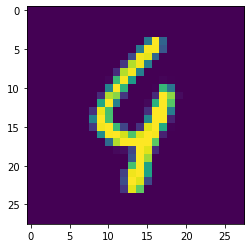

Actual: 2, Predicted: 9


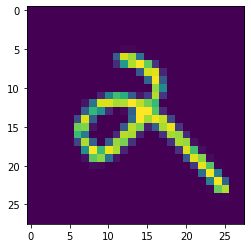

Actual: 4, Predicted: 6


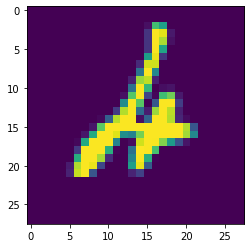

Actual: 3, Predicted: 7


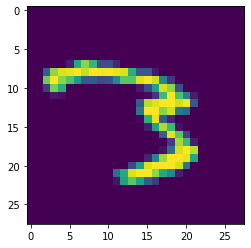

Actual: 6, Predicted: 0


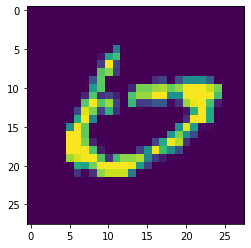

Actual: 9, Predicted: 8


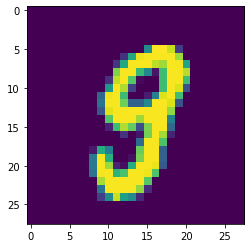

Actual: 8, Predicted: 2


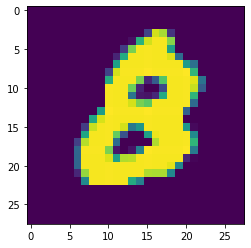

Actual: 8, Predicted: 2


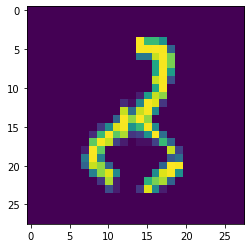

Actual: 1, Predicted: 8


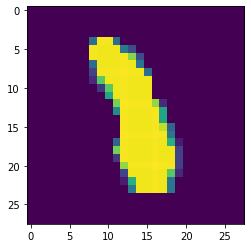

Actual: 2, Predicted: 6


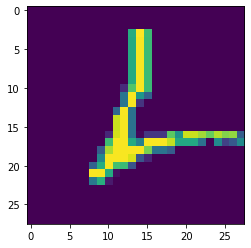

Actual: 7, Predicted: 2


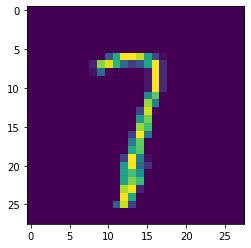

Actual: 7, Predicted: 2


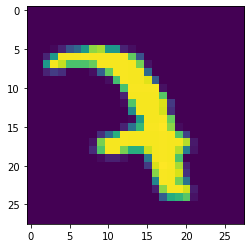

Actual: 4, Predicted: 9


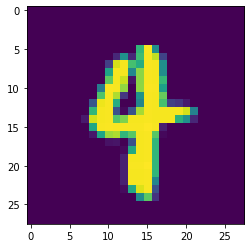

Actual: 5, Predicted: 8


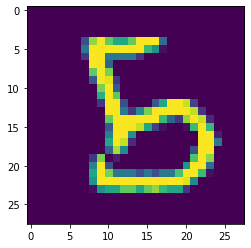

Actual: 8, Predicted: 7


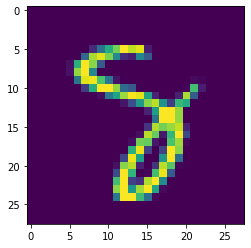

Actual: 9, Predicted: 4


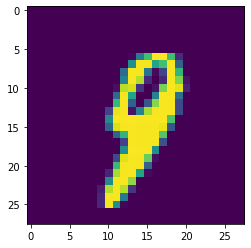

Actual: 8, Predicted: 6


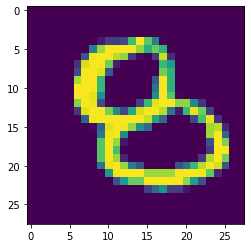

Actual: 8, Predicted: 9


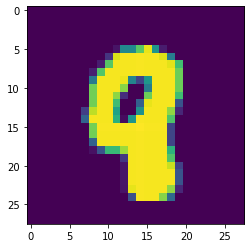

Actual: 5, Predicted: 4


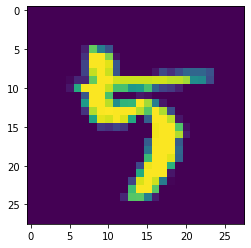

Actual: 6, Predicted: 5


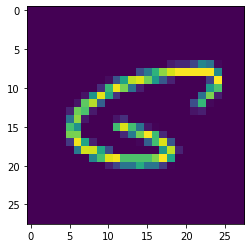

Actual: 7, Predicted: 2


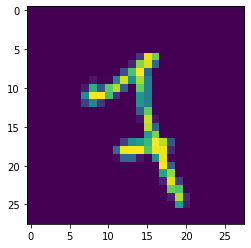

Actual: 4, Predicted: 6


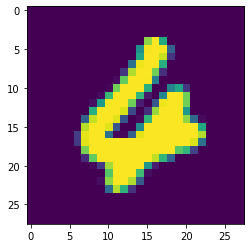

Actual: 2, Predicted: 1


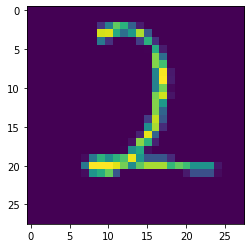

Actual: 7, Predicted: 3


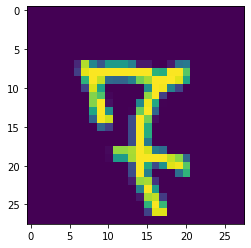

Actual: 2, Predicted: 6


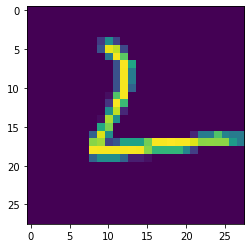

Actual: 7, Predicted: 2


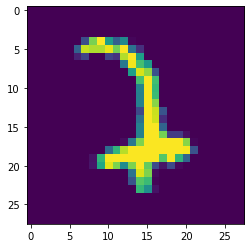

Actual: 9, Predicted: 6


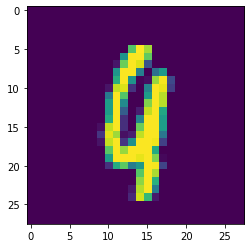

Actual: 4, Predicted: 9


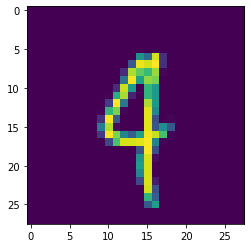

Actual: 9, Predicted: 3


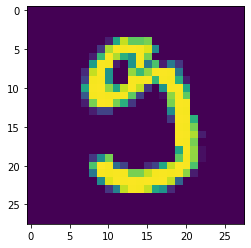

Actual: 7, Predicted: 2


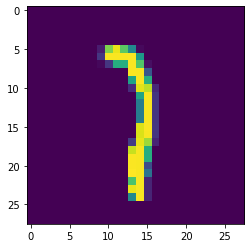

Actual: 5, Predicted: 9


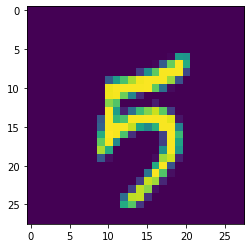

Actual: 5, Predicted: 7


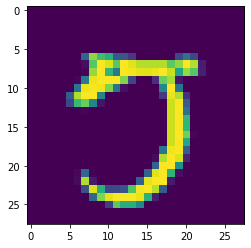

Actual: 8, Predicted: 3


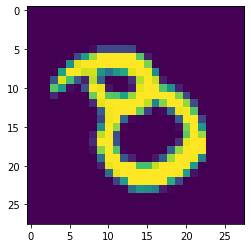

Actual: 7, Predicted: 9


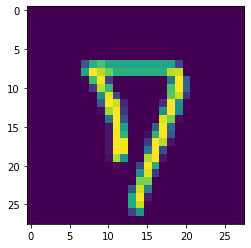

Actual: 5, Predicted: 6


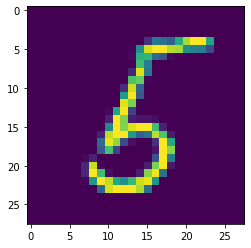

Actual: 5, Predicted: 3


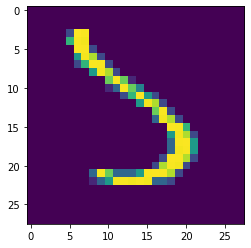

Actual: 2, Predicted: 3


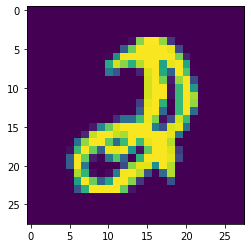

Actual: 7, Predicted: 9


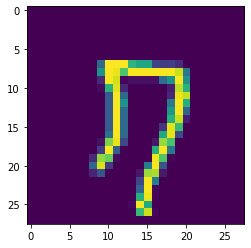

Actual: 7, Predicted: 9


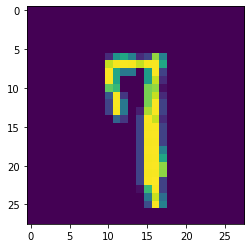

Actual: 8, Predicted: 7


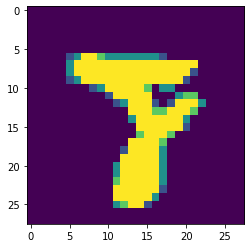

Actual: 4, Predicted: 6


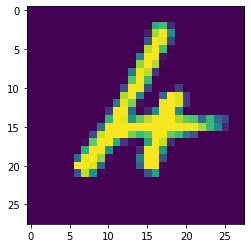

Actual: 9, Predicted: 3


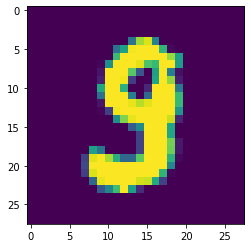

Actual: 2, Predicted: 3


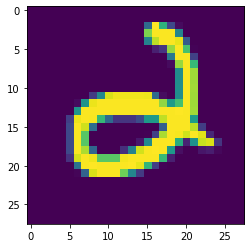

Actual: 0, Predicted: 6


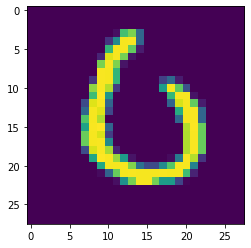

Actual: 5, Predicted: 3


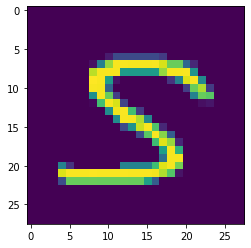

Actual: 3, Predicted: 7


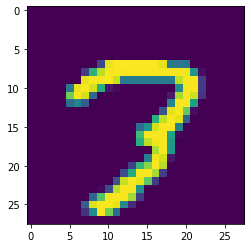

Actual: 8, Predicted: 0


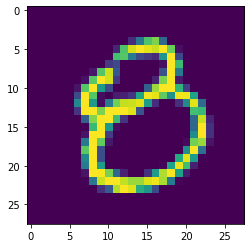

Actual: 7, Predicted: 9


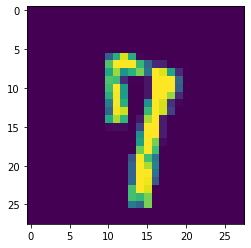

Actual: 0, Predicted: 7


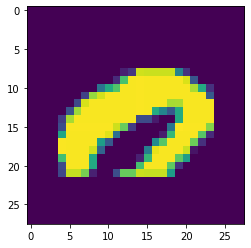

Actual: 2, Predicted: 8


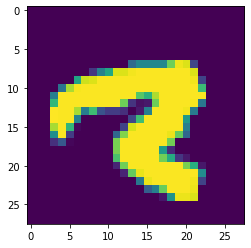

Actual: 6, Predicted: 4


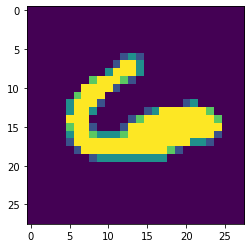

Actual: 9, Predicted: 4


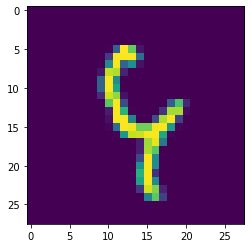

Actual: 7, Predicted: 8


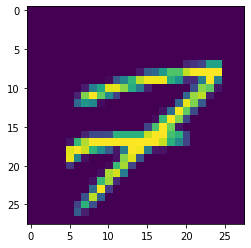

Actual: 9, Predicted: 8


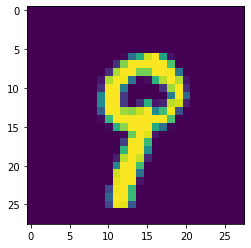

Actual: 8, Predicted: 3


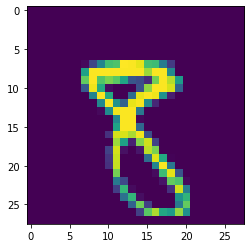

Actual: 7, Predicted: 2


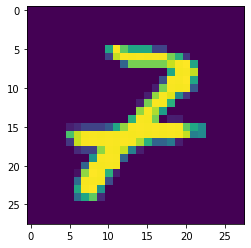

Actual: 1, Predicted: 8


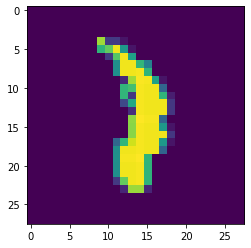

Actual: 7, Predicted: 9


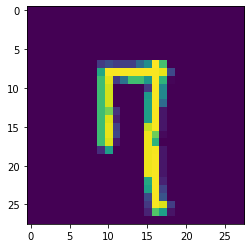

Actual: 8, Predicted: 4


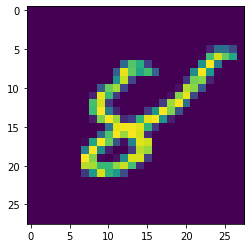

Actual: 4, Predicted: 9


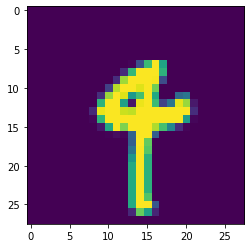

Actual: 2, Predicted: 0


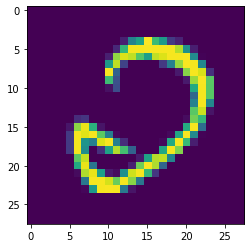

Actual: 3, Predicted: 2


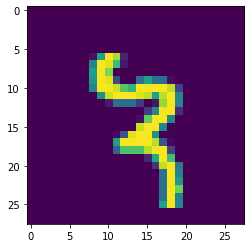

Actual: 6, Predicted: 0


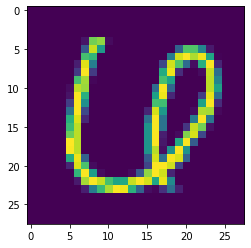

Actual: 6, Predicted: 1


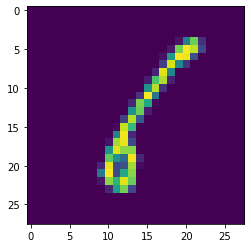

Actual: 1, Predicted: 2


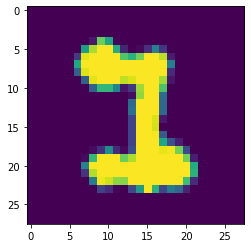

Actual: 9, Predicted: 1


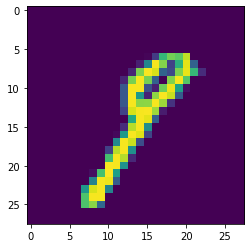

Actual: 8, Predicted: 0


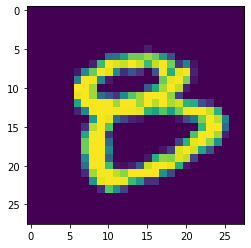

Actual: 5, Predicted: 9


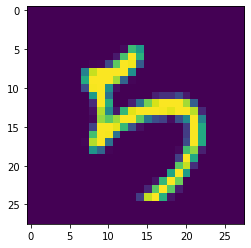

Actual: 9, Predicted: 1


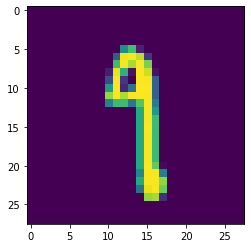

Actual: 9, Predicted: 8


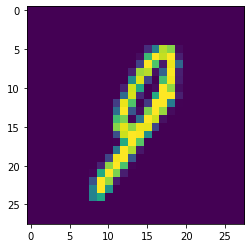

Actual: 9, Predicted: 4


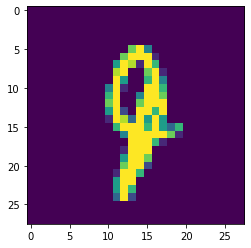

Actual: 6, Predicted: 4


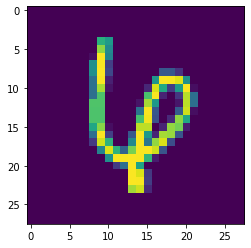

Actual: 2, Predicted: 0


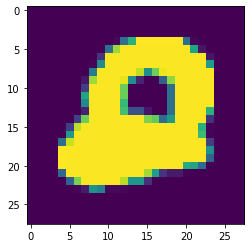

Actual: 2, Predicted: 4


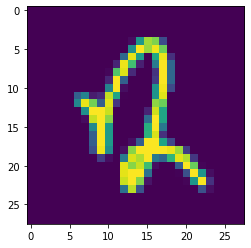

Actual: 5, Predicted: 3


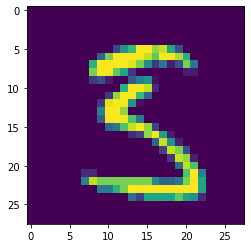

Actual: 9, Predicted: 0


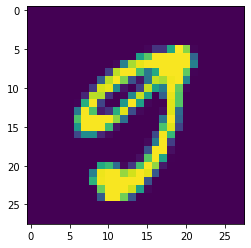

Actual: 6, Predicted: 1


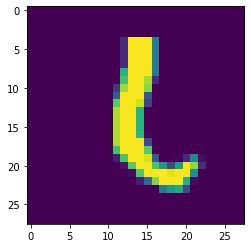

Actual: 7, Predicted: 4


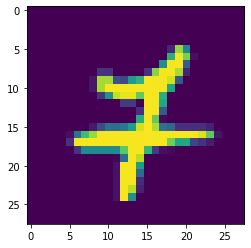

Actual: 4, Predicted: 9


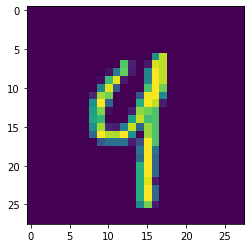

Actual: 5, Predicted: 3


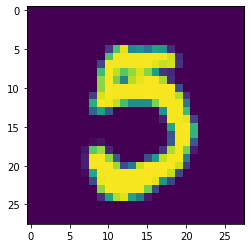

Actual: 8, Predicted: 0


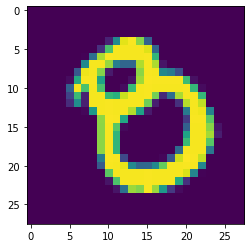

Actual: 7, Predicted: 3


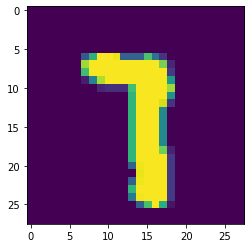

Actual: 3, Predicted: 8


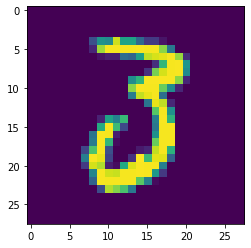

Actual: 3, Predicted: 2


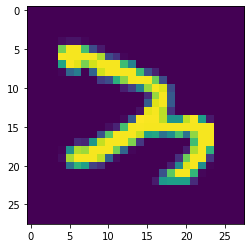

Actual: 9, Predicted: 7


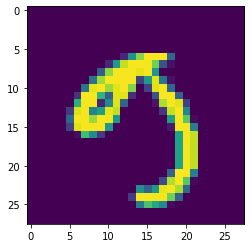

Actual: 7, Predicted: 3


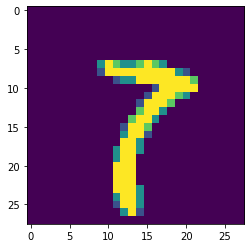

Actual: 8, Predicted: 6


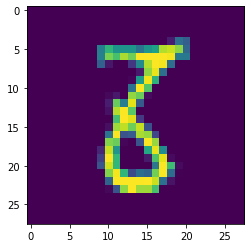

Actual: 7, Predicted: 9


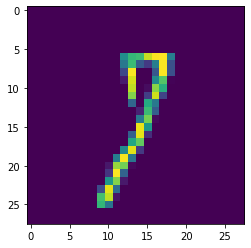

Actual: 8, Predicted: 9


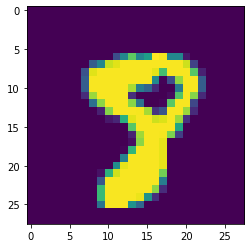

Actual: 2, Predicted: 3


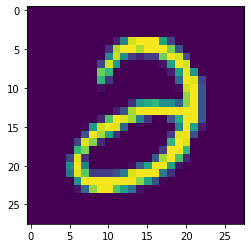

Actual: 2, Predicted: 6


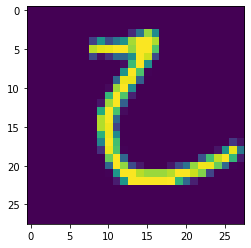

Actual: 3, Predicted: 7


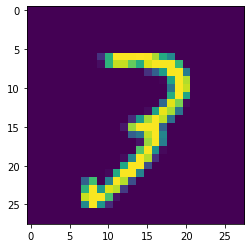

Actual: 9, Predicted: 1


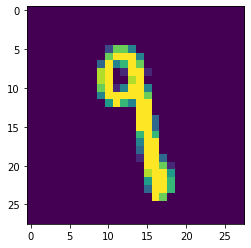

Actual: 6, Predicted: 4


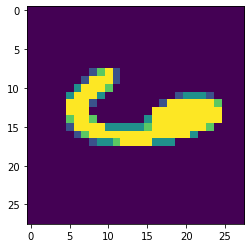

Actual: 5, Predicted: 0


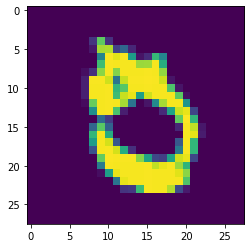

Actual: 8, Predicted: 5


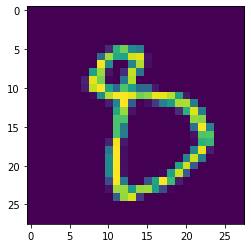

Actual: 8, Predicted: 5


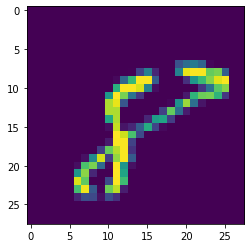

Actual: 8, Predicted: 0


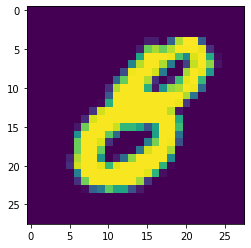

Actual: 7, Predicted: 2


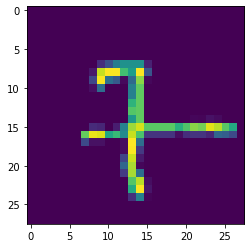

Actual: 7, Predicted: 2


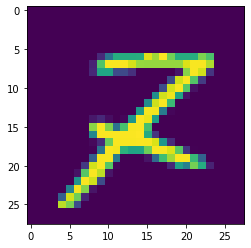

Actual: 7, Predicted: 8


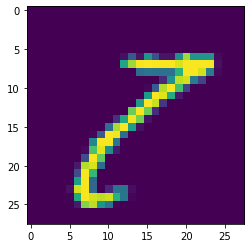

Actual: 0, Predicted: 6


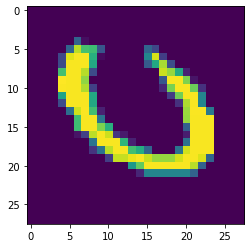

Actual: 9, Predicted: 4


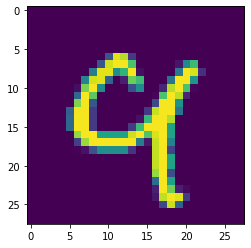

Actual: 5, Predicted: 6


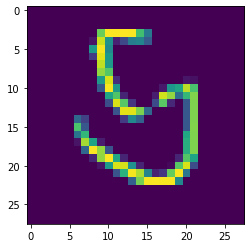

Actual: 1, Predicted: 2


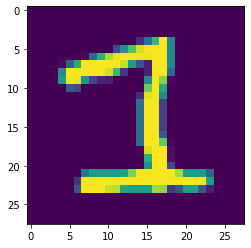

Actual: 9, Predicted: 3


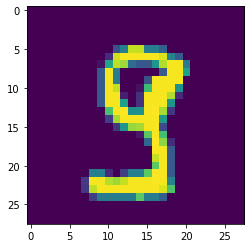

Actual: 4, Predicted: 6


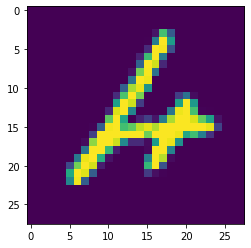

Actual: 7, Predicted: 1


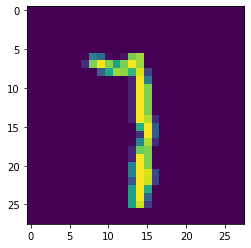

Actual: 7, Predicted: 1


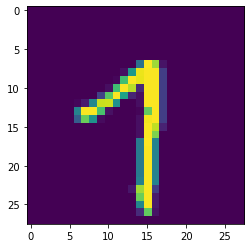

Actual: 0, Predicted: 9


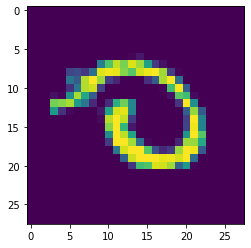

Actual: 9, Predicted: 3


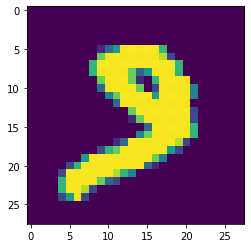

Actual: 2, Predicted: 7


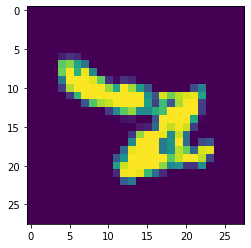

Actual: 9, Predicted: 7


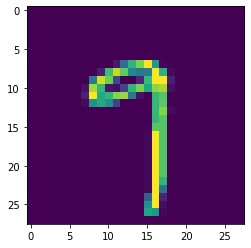

Actual: 2, Predicted: 8


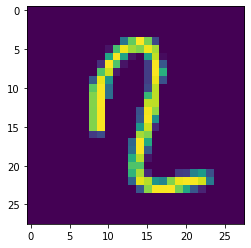

Actual: 4, Predicted: 8


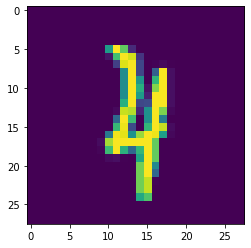

Actual: 2, Predicted: 7


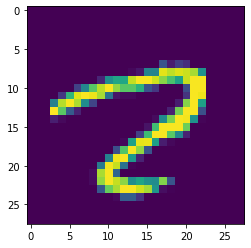

Actual: 4, Predicted: 7


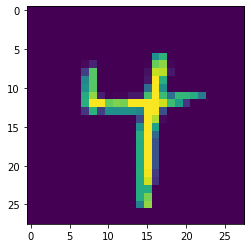

Actual: 3, Predicted: 9


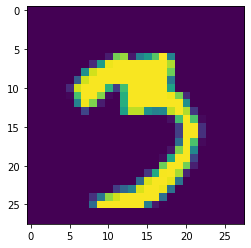

Actual: 5, Predicted: 3


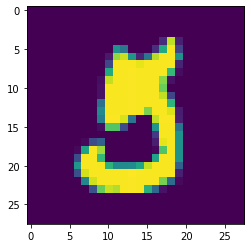

Actual: 9, Predicted: 4


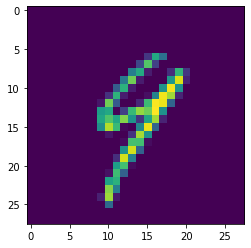

Actual: 4, Predicted: 9


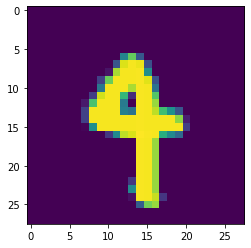

KeyboardInterrupt: ignored

In [ ]:
for i in range(y_pred_value.shape[0]):
  if y_pred_value[i] != y_test[i]:
    img = x_test[i]
    print("Actual: {}, Predicted: {}".format(y_test[i], y_pred_value[i]))
    plt.imshow(img.reshape(28, 28))
    plt.show()